project for conora effect to all business and prediction of future 

owner Nitin Faye

## Detail approch

1. Problem Statement



Business Problem:

In the coming weeks and months, our task is to ominously examine how the coronavirus could affect different nations.

We are required to predict potential COVID-19 cases across all the globe on an everyday basis. The objective is to gauge COVID-19 on three metrics- confirmed cases, recovered cases and death events for the next day using historical data as on a given date.

It is, therefore, necessary to analyse the data around COVID-19 events and it is critical to keep a tab on the disease metrics to track the outbreak.

Data Description:

Features:

Country/Region: Name of Country/Region.

Date Stamp: The sequence of historical counts with since 22nd Jan 2020.

The 3 .csv files contain historic counts per country for (Confirmed, Recovered and Death).

1)covid_confirmed_daily_updates.csv – Contains the count of confirmed COVID cases.

2)covid_deaths_daily_updates.csv – Contains the count of COVID patient deaths.

3)covid_recovered_daily_updates.csv – Contains the count of recovered COVID patients.

Installing **Libraries**

In [0]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import matplotlib.colors as mcolors
 from matplotlib.pylab import rcParams
 from matplotlib.colors import ListedColormap
 import random
 import math
 import time
 from sklearn.model_selection import RandomizedSearchCV
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler   
 from sklearn.svm import SVC
 from sklearn.svm import SVR
 from sklearn.model_selection import cross_val_score
 from sklearn.model_selection import GridSearchCV
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import mean_squared_error, mean_absolute_error
 import datetime
 import operator
 import os
 plt.style.use('seaborn')
 %matplotlib inline


Reading Data


In [0]:
confirmed_cases = pd.read_csv('covid_confirmed_daily_updates.csv',parse_dates=False)
deaths_reported = pd.read_csv('covid_deaths_daily_updates.csv',parse_dates=False)
recovered_cases = pd.read_csv('covid_recovered_daily_updates.csv',parse_dates=False)

In [0]:
confirmed_cases.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [0]:
deaths_reported.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
recovered_cases.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
cols=confirmed_cases.keys()
cols

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20'],
      dtype='object')

In [0]:
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:,cols[4]:cols[-1]]

In [0]:
confirmed.head()

,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [0]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []   
total_recovered = []

In [0]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [0]:
confirmed_sum	
death_sum
recovered_sum


72624

In [0]:

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)	

In [0]:
#world_class

In [0]:
#total_deaths

In [0]:
#total_recovered


In [0]:
days_in_future= 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [0]:
#future_forecast


In [0]:
days_in_future= 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forcast[:-10]

In [0]:
start = '1/22/2020' 
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = [] 
for i in range(len(future_forcast)): 
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [0]:
latest_confirmed = confirmed_cases[dates[-1]]

In [0]:
latest_deaths = deaths_reported[dates[-1]]

In [0]:
latest_recovreies =  recovered_cases[dates[-1]]

In [0]:
latest_confirmed

0        11
1        38
2        37
3         1
4         1
       ... 
138    1143
139       4
140       2
141      53
142       0
Name: 3/14/20, Length: 143, dtype: int64

In [0]:
latest_deaths


0       0
1       1
2       3
3       0
4       0
       ..
138    21
139     0
140     0
141     0
142     0
Name: 3/14/20, Length: 143, dtype: int64

In [0]:
latest_recovreies


0       0
1       0
2      12
3       1
4       0
       ..
138    19
139     0
140     0
141    16
142     0
Name: 3/14/20, Length: 143, dtype: int64

In [0]:
unique_countries = list(confirmed_cases['Country/Region'].unique())


In [0]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
       country_confirmed_cases.append(cases)
    else:
       no_cases.append(i)
for i in no_cases:
    unique_countries.remove(i)


In [0]:
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [0]:
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
Afghanistan: 11 cases
Albania: 38 cases
Algeria: 37 cases
Andorra: 1 cases
Antigua and Barbuda: 1 cases
Argentina: 34 cases
Armenia: 18 cases
Aruba: 2 cases
Australia: 250 cases
Austria: 655 cases
Azerbaijan: 15 cases
Bahrain: 210 cases
Bangladesh: 3 cases
Belarus: 27 cases
Belgium: 689 cases
Bhutan: 1 cases
Bolivia: 10 cases
Bosnia and Herzegovina: 18 cases
Brazil: 151 cases
Brunei: 40 cases
Bulgaria: 41 cases
Burkina Faso: 2 cases
Cambodia: 7 cases
Cameroon: 2 cases
Canada: 198 cases
Cayman Islands: 1 cases
Chile: 61 cases
Colombia: 22 cases
Congo (Kinshasa): 2 cases
Costa Rica: 26 cases
Cote d'Ivoire: 1 cases
Croatia: 38 cases
Cruise Ship: 696 cases
Cuba: 4 cases
Curacao: 1 cases
Cyprus: 26 cases
Czechia: 189 cases
Denmark: 836 cases
Dominican Republic: 11 cases
Ecuador: 28 cases
Egypt: 109 cases
Estonia: 115 cases
Eswatini: 1 cases
Ethiopia: 1 cases
Finland: 225 cases
France: 4480 cases
French Guiana: 5 cases
Gabon: 1 cases
Georgia: 30 cases
Ge

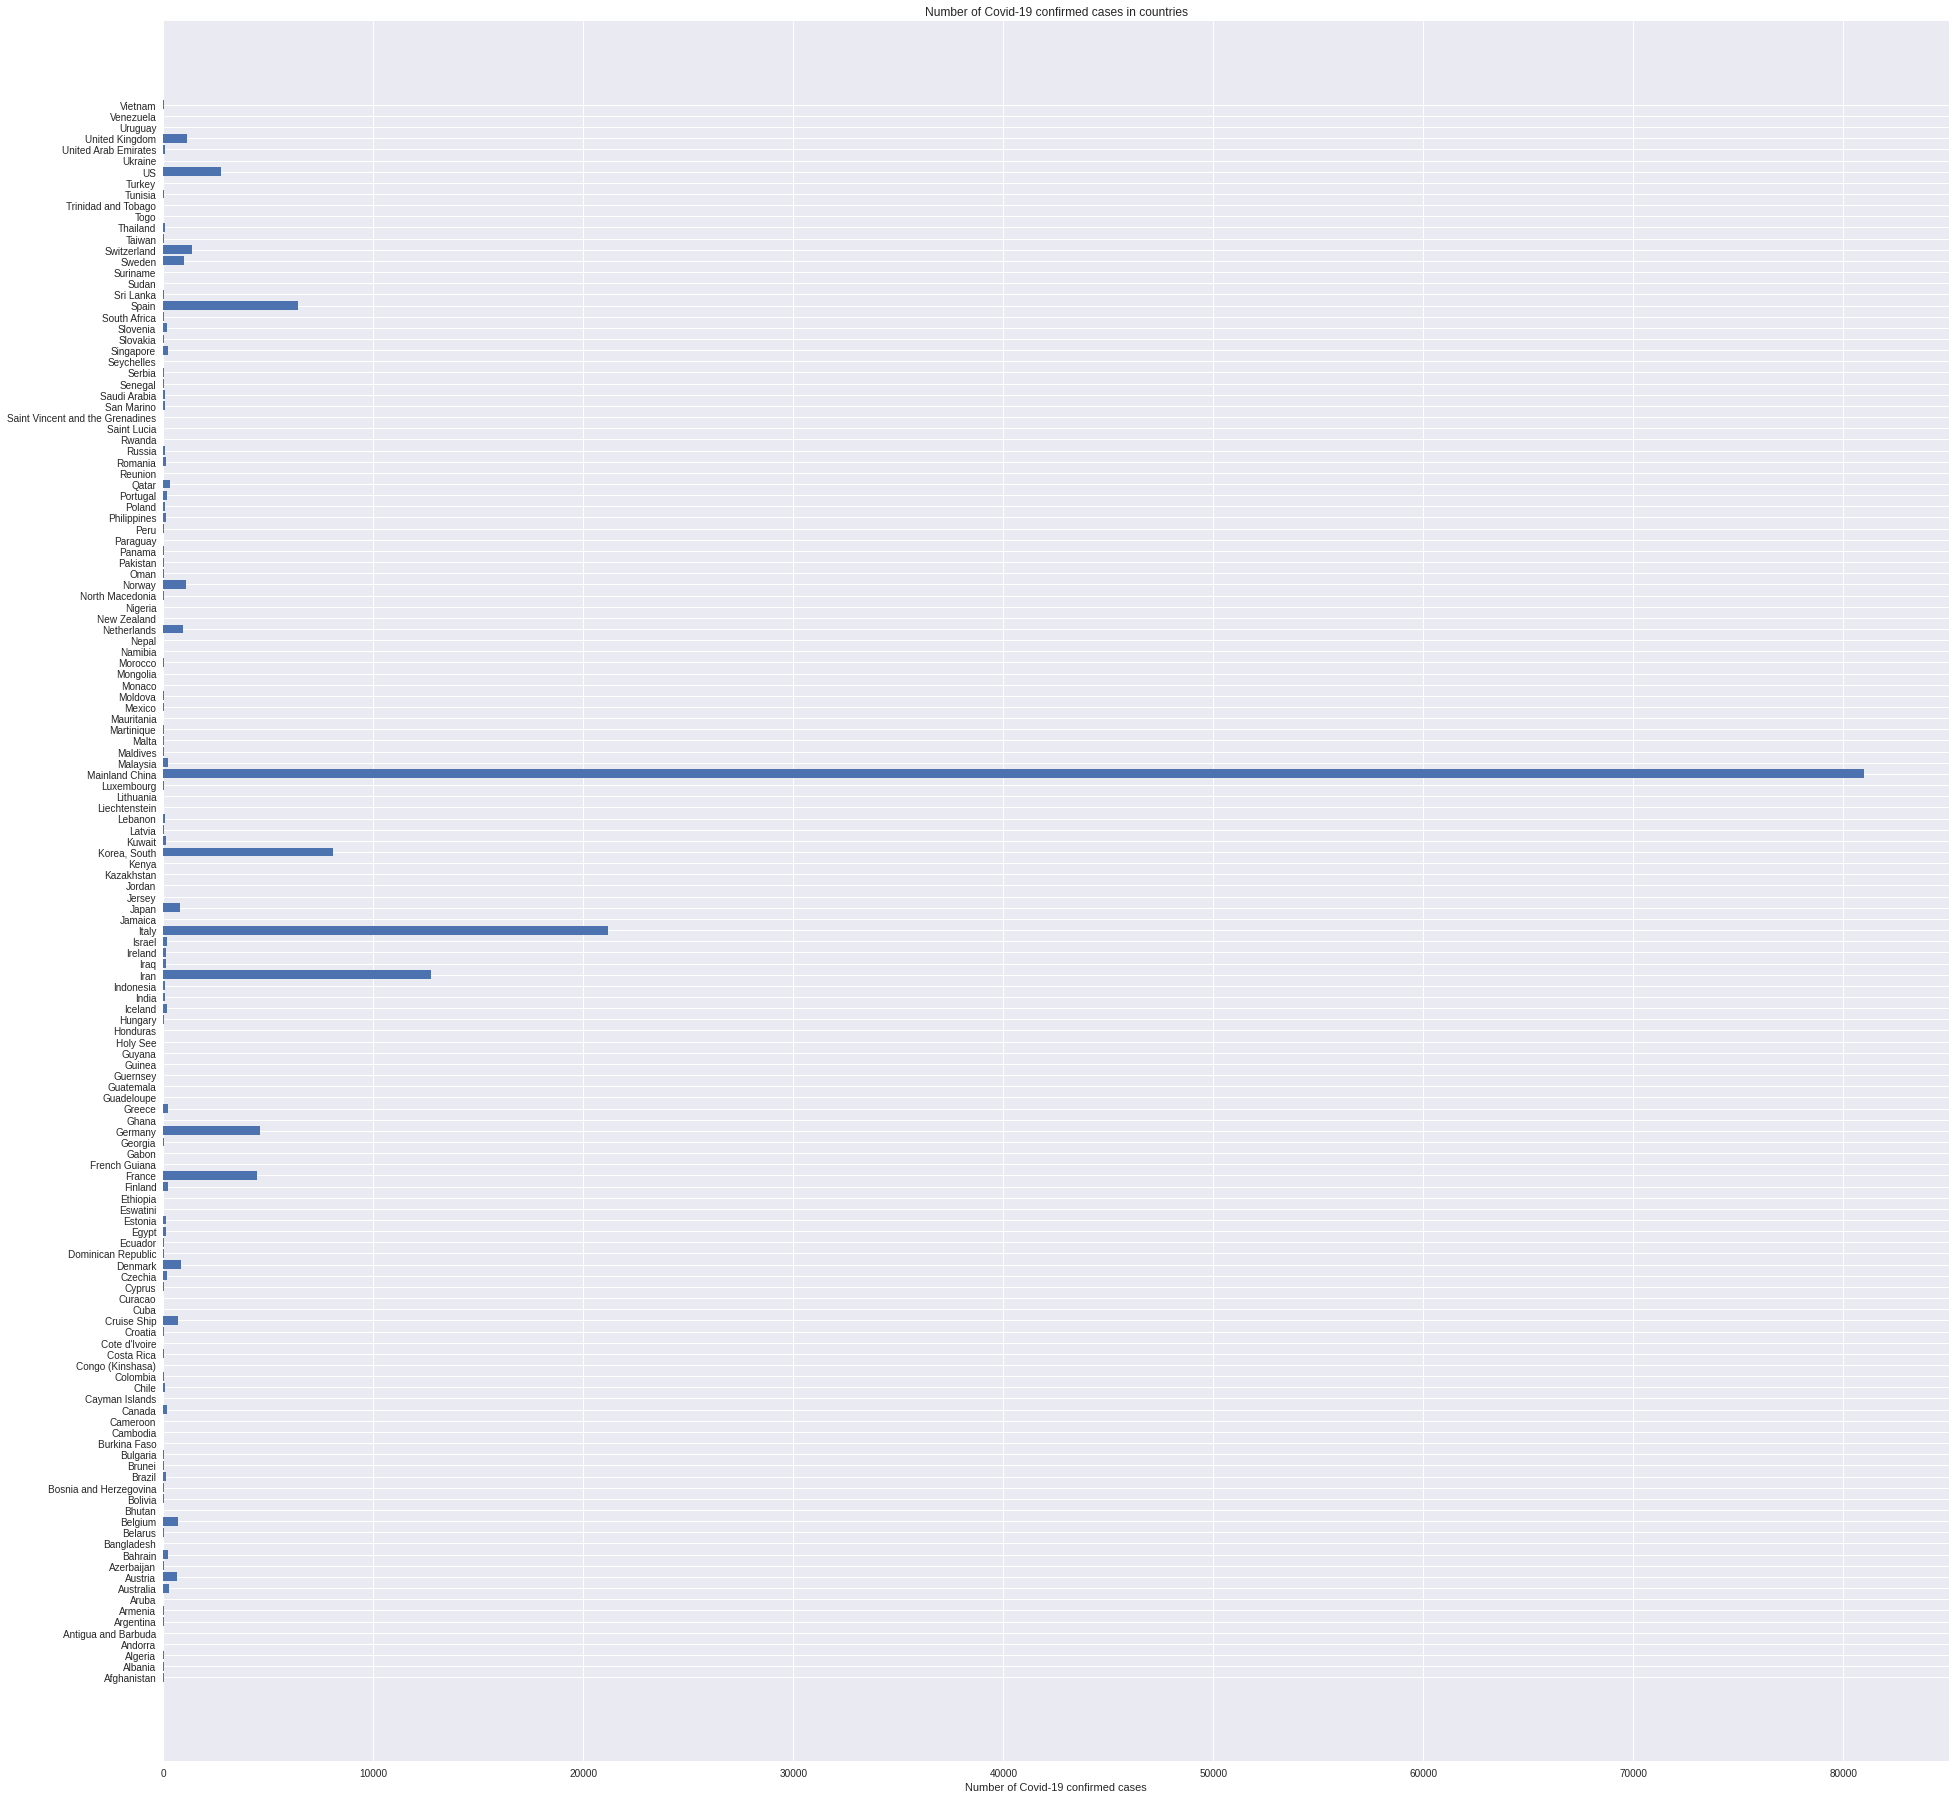

In [0]:
plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 confirmed cases in countries')
plt.xlabel('Number of Covid-19 confirmed cases')
plt.show()

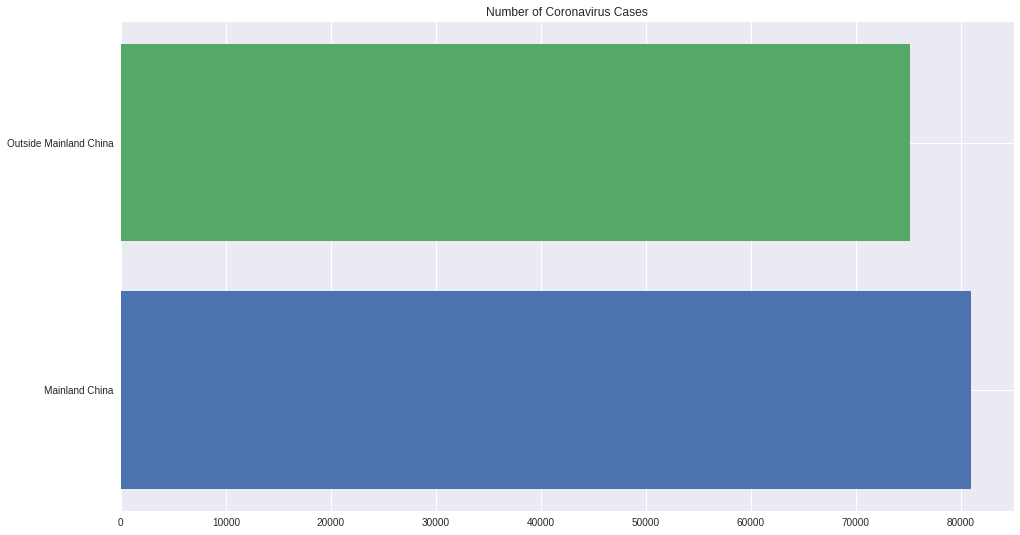

In [0]:
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='Mainland China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Coronavirus Cases')
plt.show()

In [0]:
print('Outside Mainland China {} cases:'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China 75125 cases:
Mainland China: 80977 cases
Total: 156102 cases


In [0]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

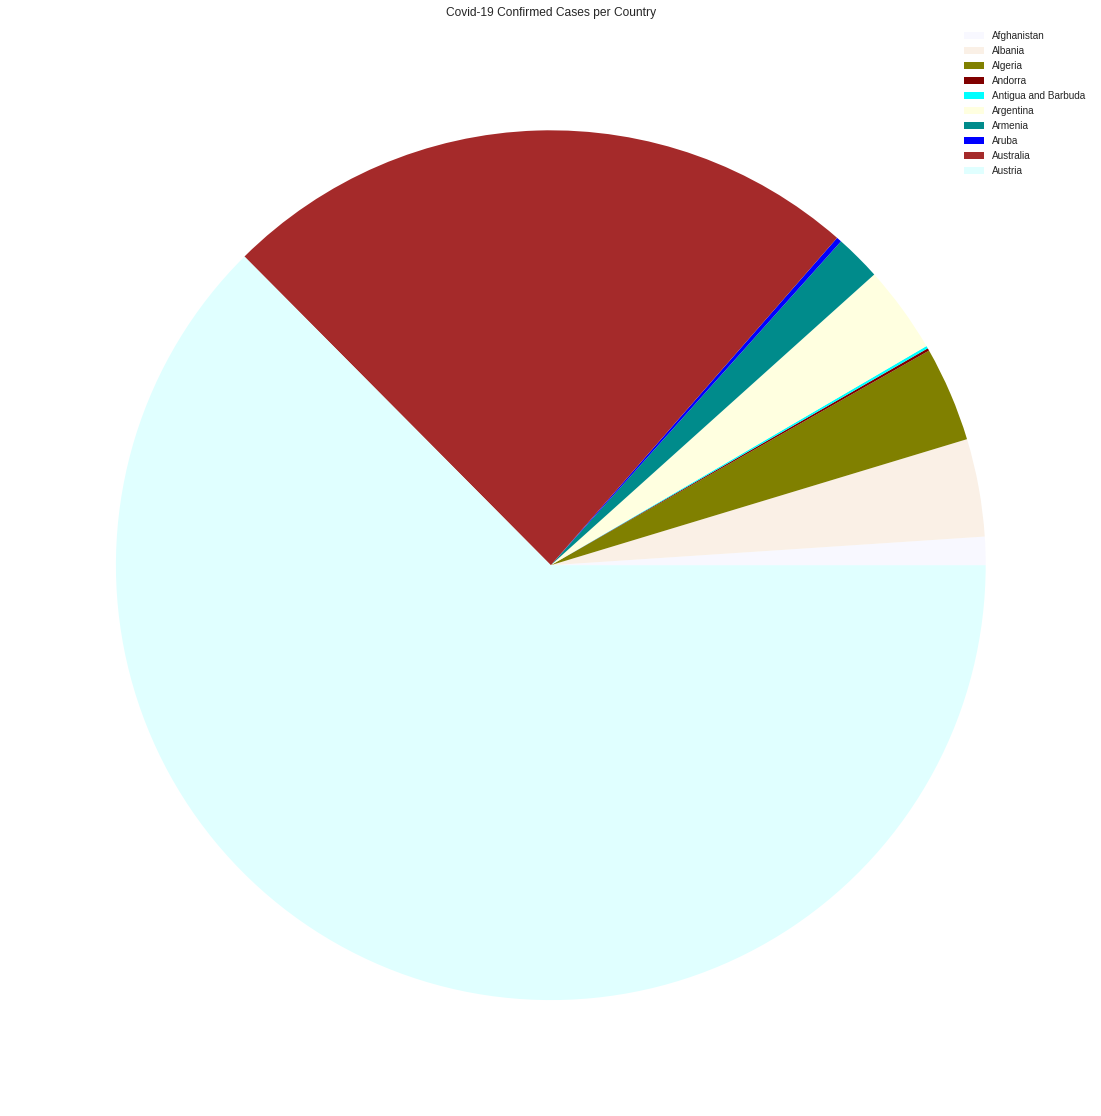

In [0]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20, 20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

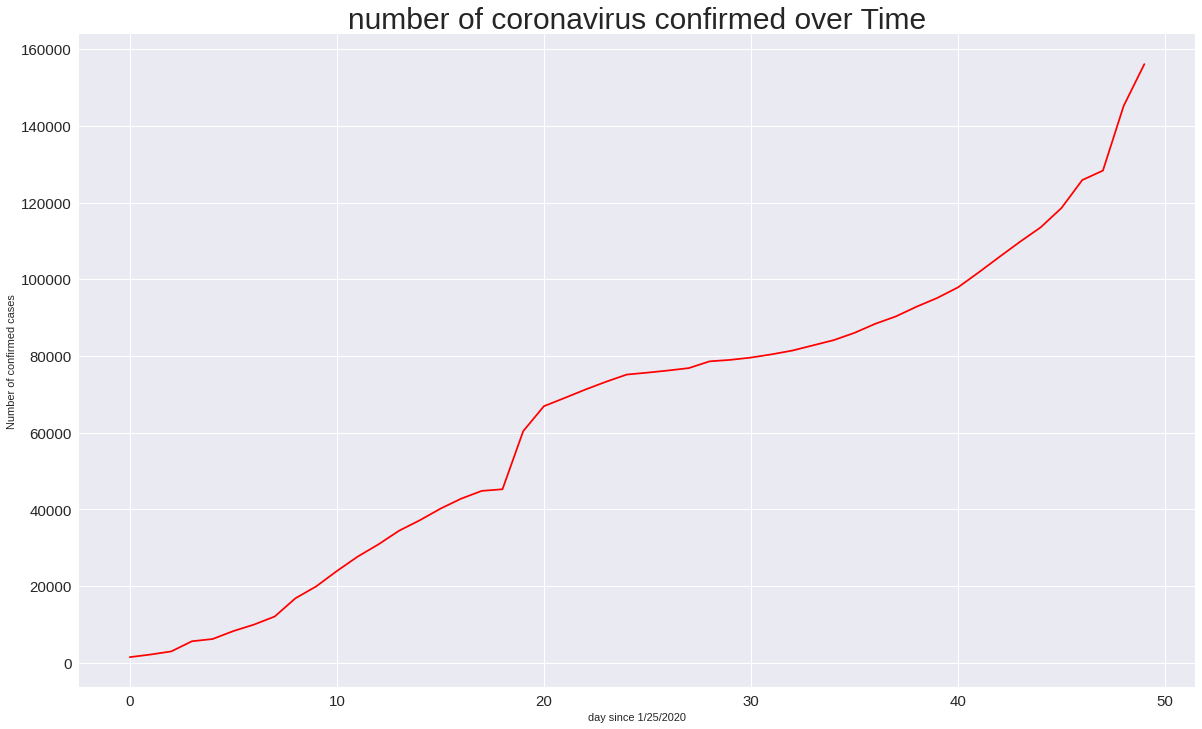

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases,color='red')
plt.title('number of coronavirus confirmed over Time',size=30)
plt.xlabel('day since 1/25/2020')
plt.ylabel('Number of confirmed cases')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

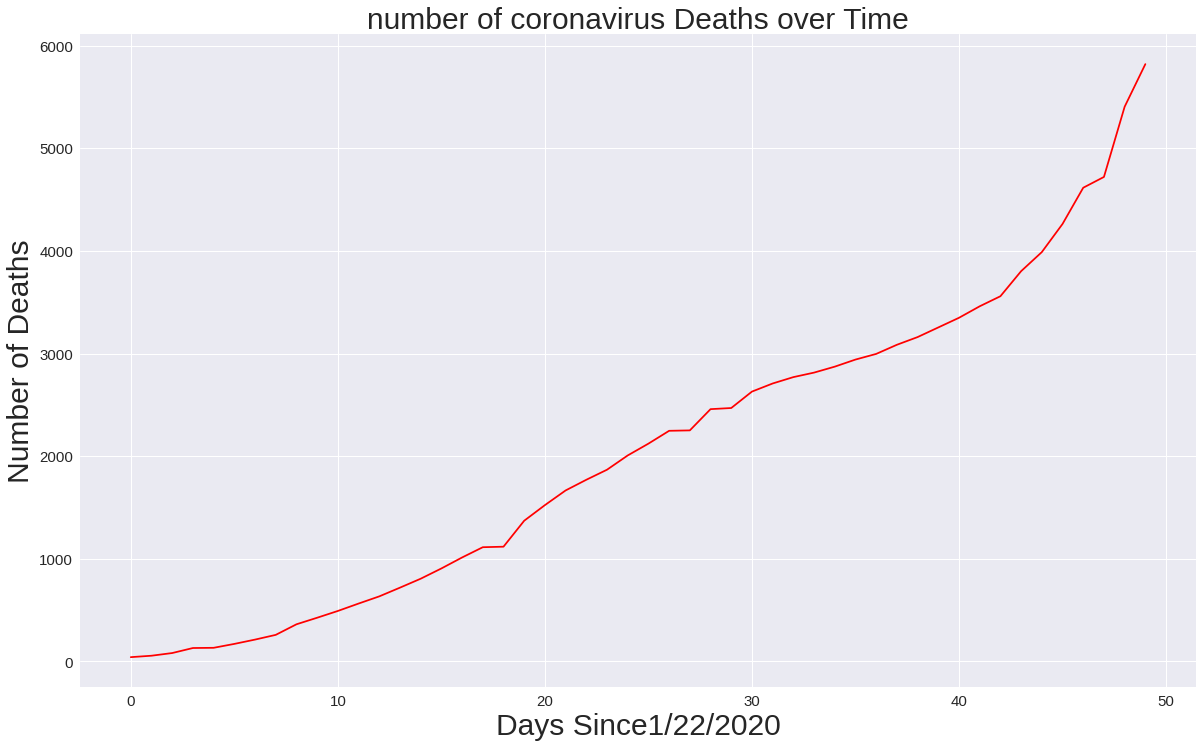

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths,color='red')
plt.title('number of coronavirus Deaths over Time',size=30)
plt.xlabel('Days Since1/22/2020',size=30)
plt.ylabel('Number of Deaths',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

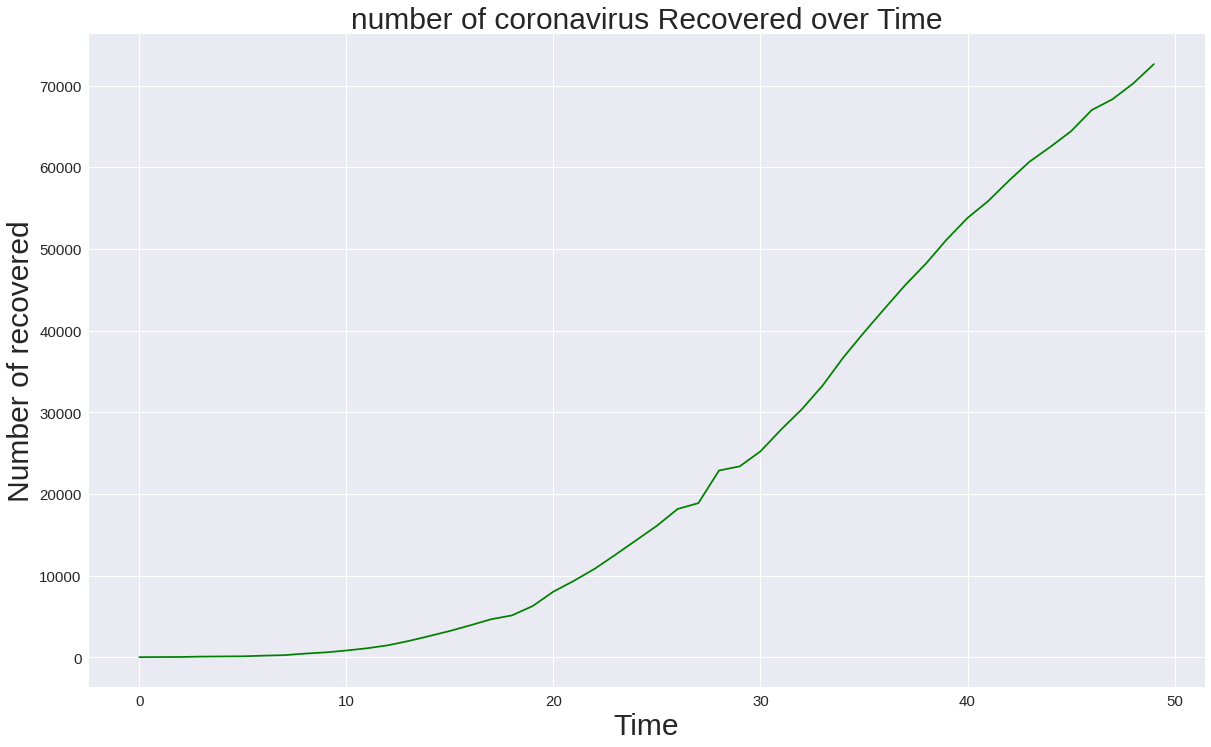

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered,color='green')
plt.title('number of coronavirus Recovered over Time',size=30)
plt.xlabel('Time',size=30)
plt.ylabel('Number of recovered',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [0]:
confirmed_cases.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
count,143.000000,143.000000,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,3.881119,4.566434,6.58042,10.027972,14.811189,20.468531,39.006993,43.118881,57.580420,69.41958,84.181818,117.391608,139.027972,167.076923,193.251748,215.503497,240.496503,259.580420,280.769231,299.034965,313.300699,316.230769,422.153846,467.727273,482.727273,498.069930,512.293706,525.426573,528.944056,532.846154,537.223776,549.503497,552.202797,556.419580,562.328671,569.195804,578.699301,588.251748,601.475524,617.965035,631.510490,649.230769,665.174825,684.48951,711.776224,740.006993,767.797203,794.132867,829.314685,880.174825,897.503497,1015.335664,1091.622378
std,45.822759,53.765605,76.92464,117.562027,173.498547,240.560490,460.648525,508.977510,680.733443,819.61581,994.294361,1390.582430,1648.641558,1982.374476,2294.537639,2557.684417,2852.264734,3078.370134,3330.488626,3541.602234,3711.521193,3742.697533,5008.418993,5548.859101,5720.674225,5896.255646,6056.875709,6205.463485,6239.577583,6277.832082,6317.312346,6438.547461,6440.236252,6458.516843,6501.384311,6535.903314,6572.587356,6600.854997,6638.442918,6688.719674,6708.533542,6724.407435,6739.206463,6757.73426,6780.186514,6800.233529,6819.266727,6840.850380,6858.500871,6895.898493,6907.099253,7008.774343,7101.375262
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,2.000000,2.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,3.000000,4.000000,5.000000,8.000000,11.000000,16.000000,26.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,6.000000,7.0

In [0]:
confirmed_cases.shape
confirmed_cases.isnull().sum().sum()

0

In [0]:
max_case_count=pd.DataFrame(confirmed_cases.groupby(['Country/Region'])['3/14/20'].mean().reset_index())
max_case_count=max_case_count.sort_values(by='3/14/20',ascending=False)
max_case_count


,Country/Region,3/14/20
81,Mainland China,80977
67,Italy,21157
63,Iran,12729
74,"Korea, South",8086
123,Spain,6391
...,...,...
86,Mauritania,1
90,Mongolia,1
93,Nepal,1
111,Rwanda,1


Time **series**

In [0]:
import datetime
import time,json
%matplotlib inline
rcParams['figure.figsize'] = 17, 6 


In [0]:
confirmed_cases =confirmed_cases.transpose()

In [0]:
confirmed_cases=confirmed_cases.rename_axis(None, axis=1).rename_axis('Date', axis=0)

In [0]:
new_header= confirmed_cases.iloc[0]
confirmed_cases= confirmed_cases[1:]
confirmed_cases.columns = new_header
confirmed_cases.shape


(53, 143)

In [0]:
confirmed_cases.index=pd.to_datetime(confirmed_cases.index)
confirmed_cases.index.freq='D'
confirmed_cases.index
confirmed_cases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Cayman Islands,Chile,Colombia,Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cruise Ship,Cuba,Curacao,Cyprus,Czechia,Denmark,Dominican Republic,Ecuador,...,Peru,Philippines,Poland,Portugal,Qatar,Reunion,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Venezuela,Vietnam,occupied Palestinian territory
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,1,0,0,0,0,0,2,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,2,0,0,0,0,0,2,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3,7,0,0,0,0,2,0,0,0,0,0,2,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,4,8,0,0,0,0,5,0,0,0,0,0,2,0


In [0]:
China=pd.DataFrame(confirmed_cases['Mainland China'] )
China.head()

,Mainland China
Date,
2020-01-22,548
2020-01-23,643
2020-01-24,920
2020-01-25,1406
2020-01-26,2075


In [0]:
China=China.rename(columns = {'Mainland China':'China_confirmed'})
China.head()

,China_confirmed
Date,
2020-01-22,548
2020-01-23,643
2020-01-24,920
2020-01-25,1406
2020-01-26,2075


In [0]:
China.sort_values(['Date'], ascending=True)
ts=China['China_confirmed'].astype(float)


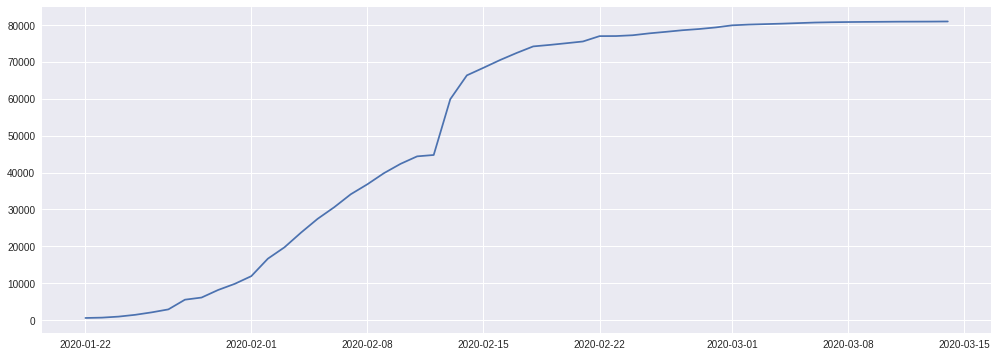

In [0]:
plt.plot(ts)

In [0]:
series_value= China.values
type(series_value)

numpy.ndarray

In [0]:
value = pd.DataFrame(series_value)
value

,0
0,548
1,643
2,920
3,1406
4,2075
5,2877
6,5509
7,6087
8,8141
9,9802


In [0]:
China_df=pd.concat([value,value.shift(1)],axis=1)
China_df.head()

,0,0
0,548,NaN
1,643,548
2,920,643
3,1406,920
4,2075,1406


In [0]:
China_df.columns =['Actual_cases','Forecast_cases']
China_df.head()

,Actual_cases,Forecast_cases
0,548,NaN
1,643,548
2,920,643
3,1406,920
4,2075,1406


In [0]:
China_df_test =China_df[40:52]
China_df_test.head()

,Actual_cases,Forecast_cases
40,80136,79932
41,80261,80136
42,80386,80261
43,80537,80386
44,80690,80537


In [0]:
mse = mean_squared_error(China_df_test.Actual_cases,China_df_test.Forecast_cases)
mse

10985.75

In [0]:
rmse= math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 104.812929


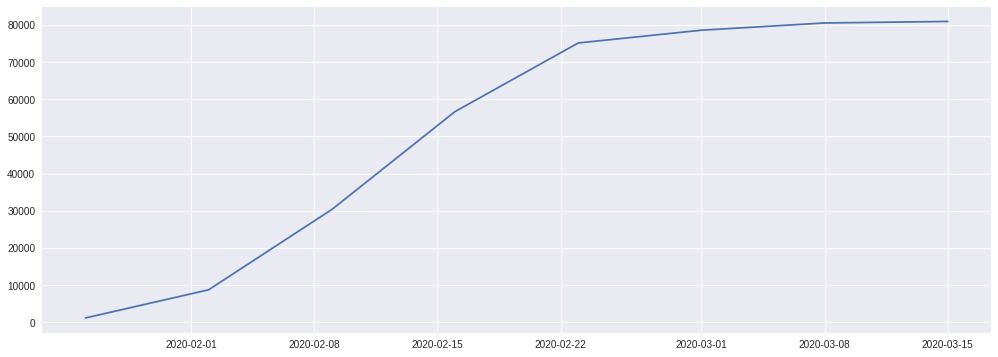

In [0]:
ts_week=ts.resample('W').mean()
plt.plot(ts_week)

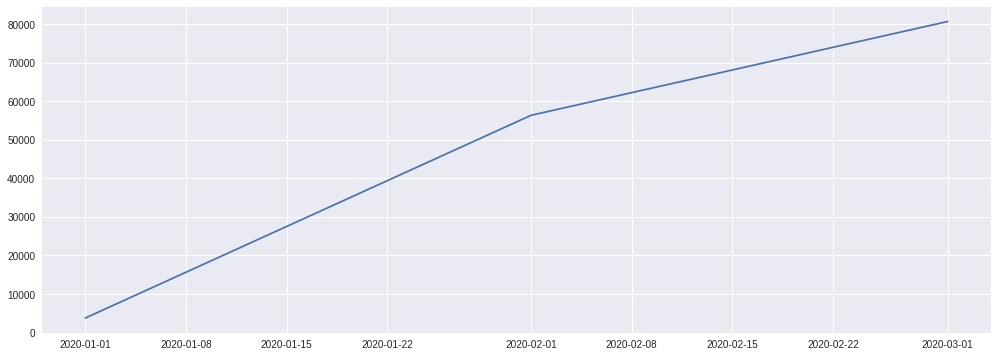

In [0]:
ts_month=ts.resample('MS').mean()
plt.plot(ts_month)

# Applying Simple Moving Average (SMA)

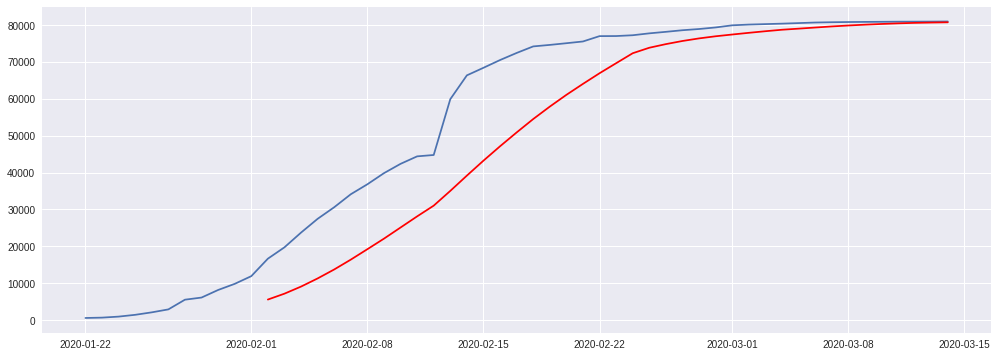

In [0]:
moving_avg=ts.rolling(12).mean()
#plt.plot(ts_week)
plt.plot(ts)
plt.plot(moving_avg, color='r')

# Applying Exponential Moving Average

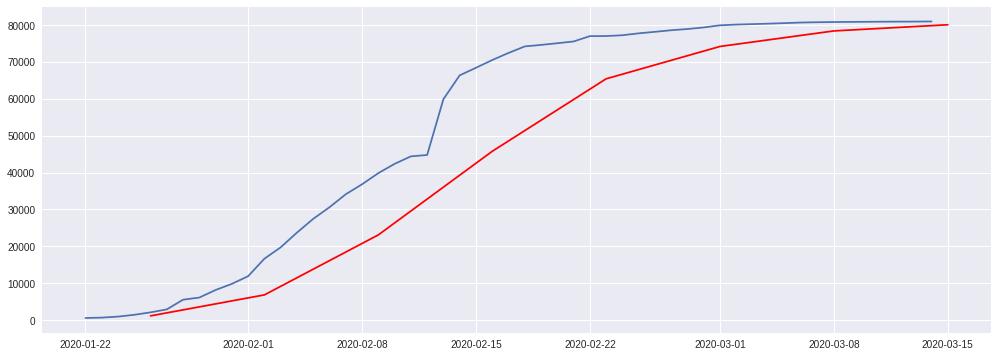

In [0]:
exp_moving_avg=ts_week.ewm(com=0.5).mean()
plt.plot(ts)
plt.plot(exp_moving_avg,color='r')

In [0]:
#Creating a function to check if the Time series is stationary or not
from statsmodels.tsa.stattools import adfuller,acf,pacf

def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    rolmean=timeseries.rolling(window=52,min_periods=1,center=False).mean()
    rolstd=timeseries.rolling(window=52,min_periods=1,center=False).std()
    
    #Plotting Rolling Statistics
    orig=plt.plot(timeseries,color='blue', label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print('Results of Dickey Fuller Test:')
    dftest=adfuller(ts, autolag='AIC')
    dfoutput=pd.Series(dftest[:4],index=['Test Statistic','p-value','#Lags Used', '#Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
                             

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


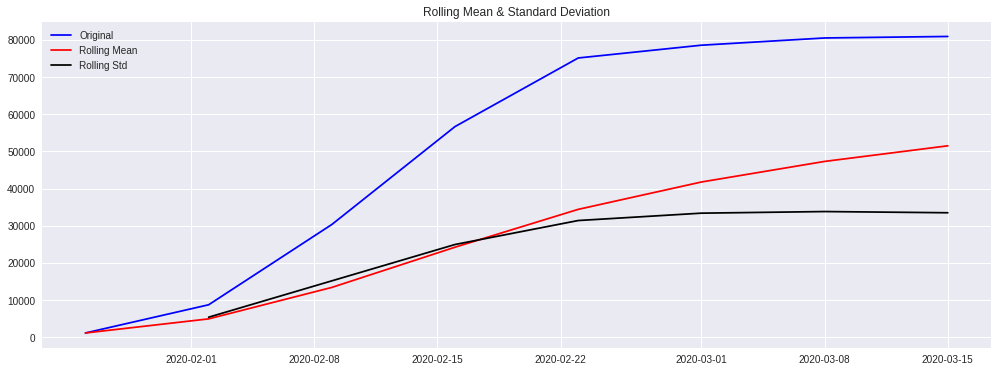

Results of Dickey Fuller Test:
Test Statistic          -2.198825
p-value                  0.206672
#Lags Used               0.000000
#Observations Used      52.000000
Critical Value (1%)     -3.562879
Critical Value (5%)     -2.918973
Critical Value (10%)    -2.597393
dtype: float64


In [0]:
test_stationarity(ts_week)

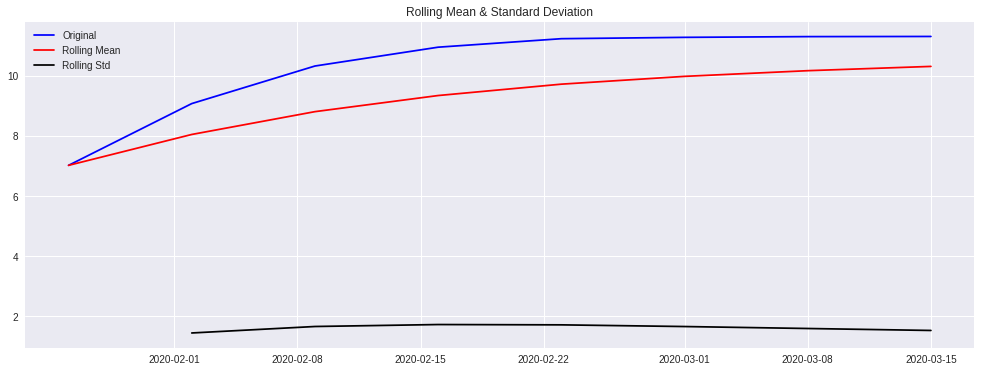

Results of Dickey Fuller Test:
Test Statistic          -2.198825
p-value                  0.206672
#Lags Used               0.000000
#Observations Used      52.000000
Critical Value (1%)     -3.562879
Critical Value (5%)     -2.918973
Critical Value (10%)    -2.597393
dtype: float64


In [0]:
import numpy as np
ts_week_log = np.log(ts_week)
test_stationarity(ts_week_log)


In [0]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose    #instead of decompose it should be seasonal_decompose
from sklearn.metrics import mean_squared_error


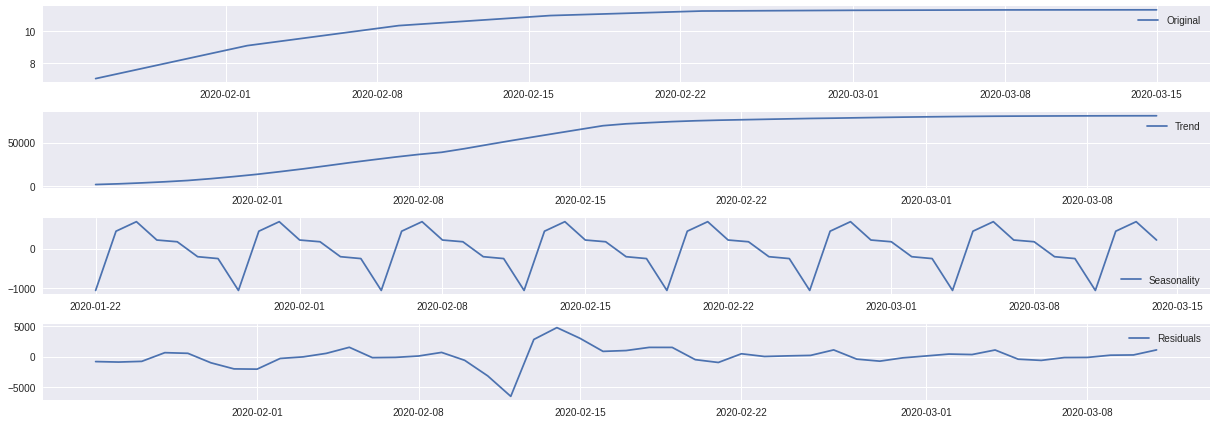

In [0]:
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
#Plotting trend, seasonal and residual of the time series0000
plt.subplot(411)
plt.plot(ts_week_log, label ='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label ='Residuals')
plt.legend(loc='best')
plt.tight_layout()

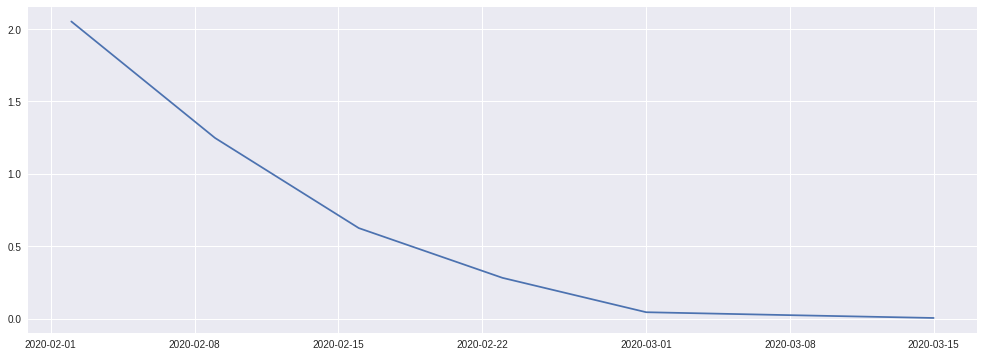

In [0]:
ts_week_log_diff = ts_week_log - ts_week_log.shift() 
plt.plot(ts_week_log_diff)

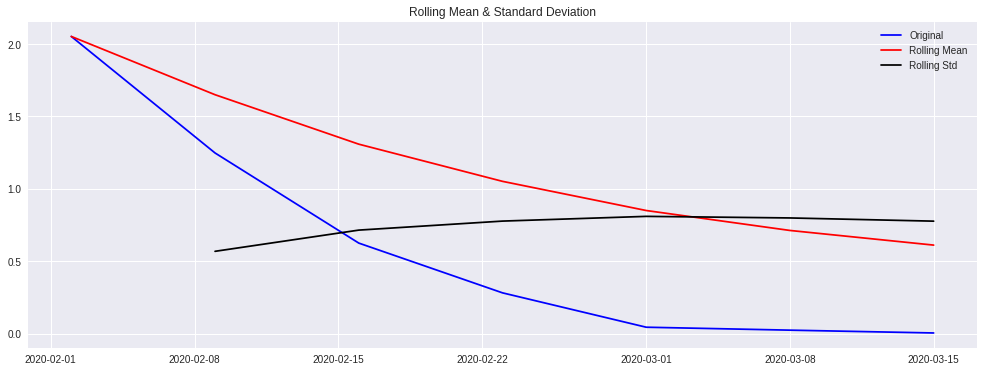

Results of Dickey Fuller Test:
Test Statistic          -2.198825
p-value                  0.206672
#Lags Used               0.000000
#Observations Used      52.000000
Critical Value (1%)     -3.562879
Critical Value (5%)     -2.918973
Critical Value (10%)    -2.597393
dtype: float64


In [0]:
ts_week_log_diff.dropna(inplace=True)
test_stationarity(ts_week_log_diff)

In [0]:
##Visualizing ACF

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

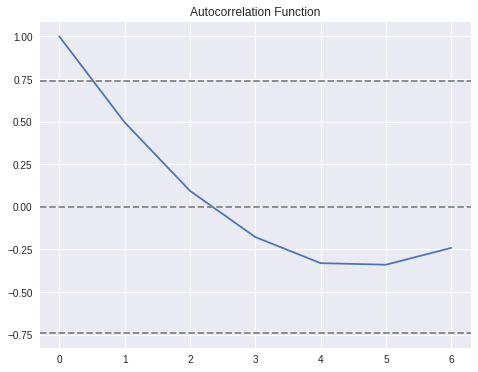

In [0]:
lag_acf = acf(ts_week_log_diff,nlags=6,)
lag_pacf = pacf(ts_week_log_diff,nlags=6,method= 'ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Partial Autocorrelation Function')

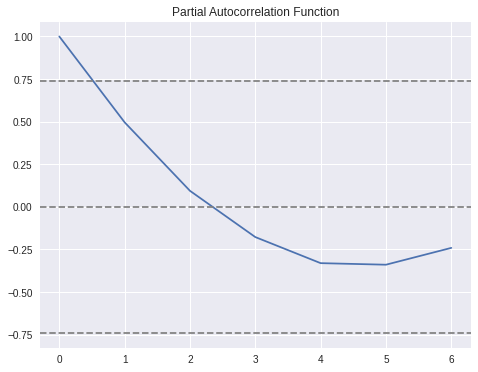

In [0]:
#Visualizing PACF
lag_acf = acf(ts_week_log_diff,nlags=6)
lag_pacf = pacf(ts_week_log_diff, nlags=6,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

In [0]:
#Applying Autoregressive (AR) Model

Residual sum of squared error:  2.3915844133520734


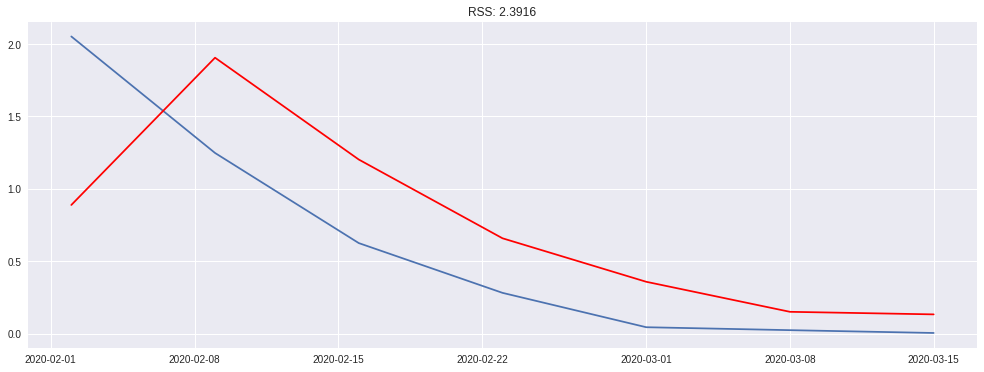

In [0]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_week_log,order=(1,1,0))
results_ARIMA = model.fit(dis=-1)
plt.plot(ts_week_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')  #Gives residual sum of squares
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_week_log_diff)**2))
print("Residual sum of squared error: ",sum((results_ARIMA.fittedvalues - ts_week_log_diff)**2))


Residual sum of square error 2.4308794966582523


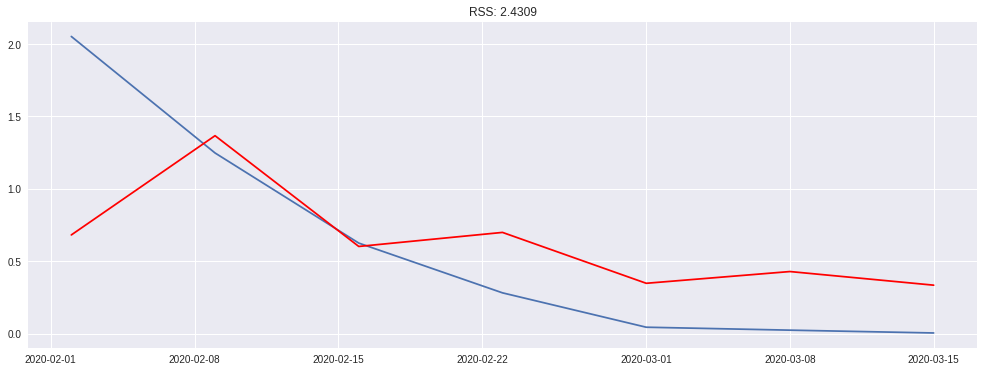

In [0]:
#Applying Moving Average (MA) Model

model = ARIMA(ts_week_log,order=(0,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_week_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')   #taking residual sum of squares
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_week_log_diff)**2))
print("Residual sum of square error", sum((results_ARIMA.fittedvalues - ts_week_log_diff)**2)) 

Residual sum of squahire error 3.6222743387652954


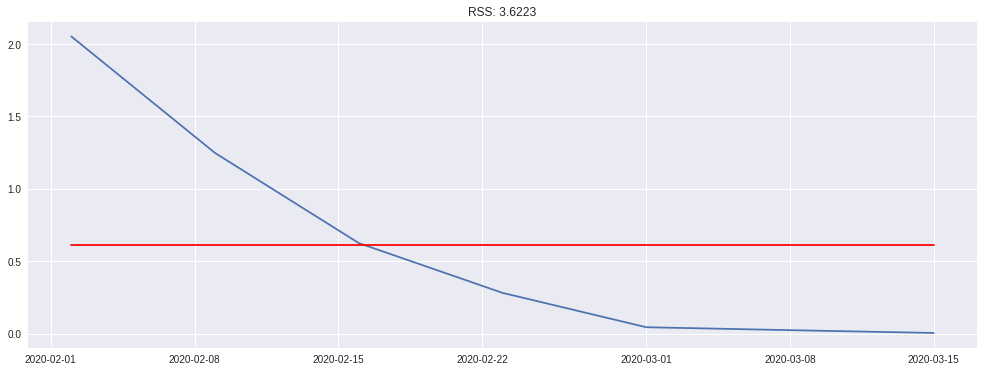

In [0]:
#Applying ARIMA Model
model = ARIMA(ts_week_log,order=(0,1,0))
results_ARIMA = model.fit(disp=0)
plt.plot(ts_week_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_week_log_diff)**2))
print("Residual sum of squahire error", sum((results_ARIMA.fittedvalues - ts_week_log_diff)**2))

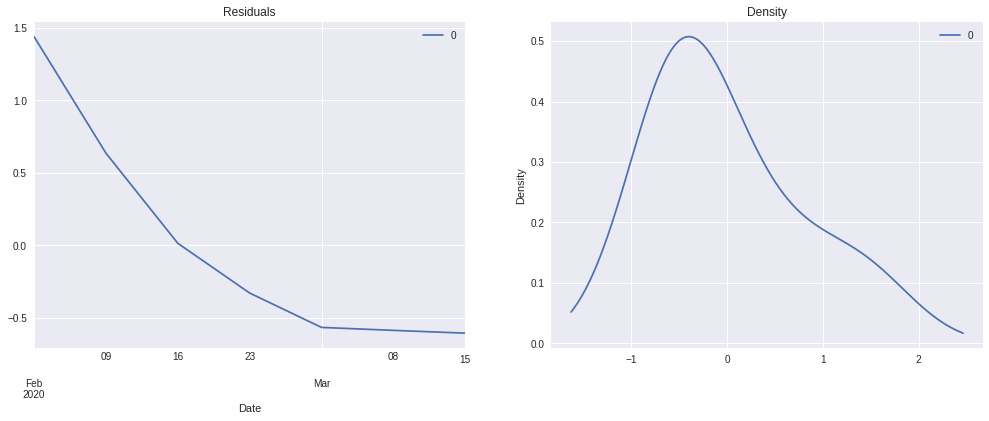

In [0]:
#Plotting residual errors

residuals = pd.DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

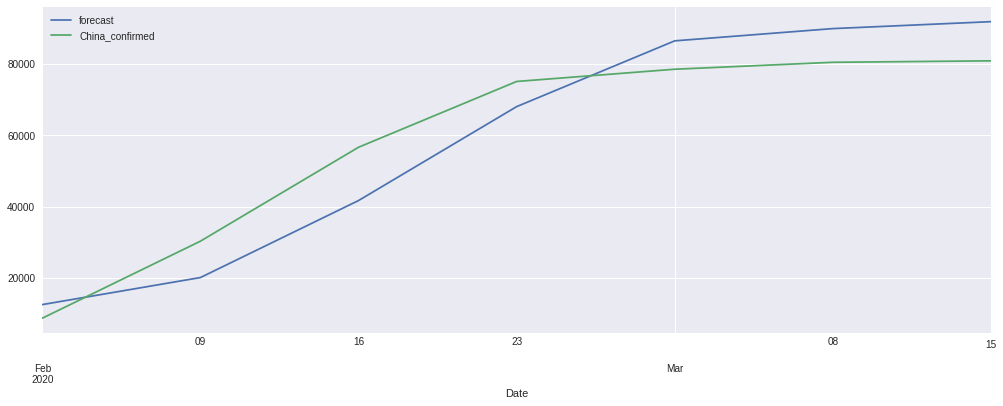

In [0]:
model = ARIMA(ts_week, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
fitted.plot_predict(dynamic=False)

plt.show()

In [0]:
from statsmodels.tsa.stattools import acf
%matplotlib inline

In [0]:
# Create Training and Test
train = ts[:40]
test = ts[-13:]

In [0]:
model = ARIMA(train, order=(0, 1, 0))  
fitted = model.fit(disp=-1) 

In [0]:
forecast = fitted.predict(start='2020-03-02', end='2020-03-14',dynamic=False)

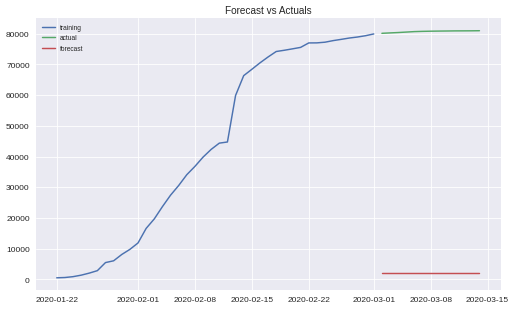

In [0]:
plt.figure(figsize=(10,6), dpi=60)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [0]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2020-02-02    0.611652
2020-02-09    0.611652
2020-02-16    0.611652
2020-02-23    0.611652
2020-03-01    0.611652
Freq: W-SUN, dtype: float64

In [0]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2020-02-02    0.611652
2020-02-09    1.223305
2020-02-16    1.834957
2020-02-23    2.446609
2020-03-01    3.058261
Freq: W-SUN, dtype: float64

In [0]:
predictions_ARIMA_log = pd.Series(ts_week_log.iloc[0],index=ts_week_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2020-01-26    7.019654
2020-02-02    7.631307
2020-02-09    8.242959
2020-02-16    8.854611
2020-02-23    9.466264
Freq: W-SUN, dtype: float64

Text(0.5, 1.0, 'RMSE: 37787.6758')

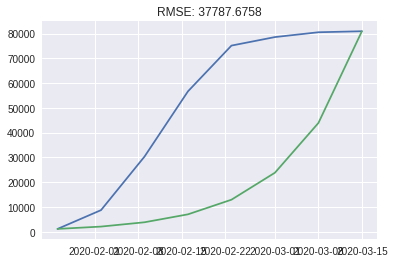

In [0]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts_week)
plt.plot(predictions_ARIMA)
#plt.plot(predictions_ARIMA_log)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - ts_week)**2)/len(ts_week)))

In [0]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.China_confirmed   No. Observations:                    7
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  -7.627
Method:                           css   S.D. of innovations              0.719
Date:                Thu, 07 May 2020   AIC                             19.253
Time:                        12:34:00   BIC                             19.145
Sample:                    02-02-2020   HQIC                            17.916
                         - 03-15-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6117      0.272      2.250      0.065       0.079       1.145
==============================================================================
"""

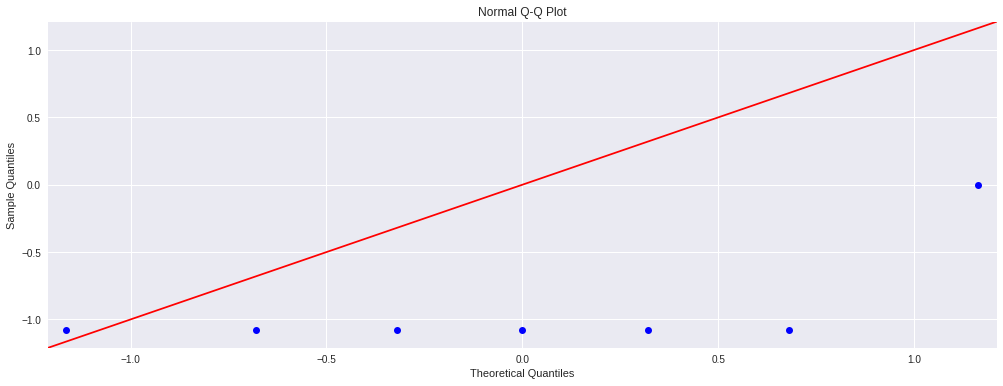

In [0]:
import scipy.stats as stats
rcParams['figure.figsize'] = 17, 6  
fig=sm.qqplot(results_ARIMA.fittedvalues,stats.t,fit=True,line='45')
plt.title('Normal Q-Q Plot')
plt.show()

#ARIMA Model Configuration

In [0]:
!pip install -q pyramid-arima==0.9.0

     |████████████████████████████████| 604kB 9.2MB/s 


In [0]:
from pyramid import auto_arima

model = auto_arima(ts_week.values, test = 'adf', start_p=1, start_q=1,
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Considering Seasonality
                      seasonal_test='ch',
                      start_P=1, start_Q=1,
                      max_P=5, max_Q=5,
                      D=1, max_D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True, approximation=False)

print(model.summary())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=186.691, BIC=187.009, Fit time=0.098 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=192.331, BIC=192.490, Fit time=0.006 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=186.534, BIC=186.773, Fit time=0.051 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=188.622, BIC=188.860, Fit time=0.048 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=186.737, BIC=187.055, Fit time=0.108 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.456 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                    8
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -90.267
Date:                Thu, 07 May 2020   AIC                            186.534
Time:                        12:34

In [0]:
model.fit(ts_week)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 0, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

# **Prediction** 

In [0]:
"""
from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
"""

'\nfrom sklearn.utils import check_arrays\ndef mean_absolute_percentage_error(y_true, y_pred): \n    y_true, y_pred = check_arrays(y_true, y_pred)\n\n    ## Note: does not handle mix 1d representation\n    #if _is_1d(y_true): \n    #    y_true, y_pred = _check_1d_array(y_true, y_pred)\n\n    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100\n'

In [0]:
y_pred = model.predict(n_periods=len(ts_week))
from sklearn.metrics import r2_score,mean_absolute_error
#accuracy=r2_score(ts_week.values, y_pred)
#mpe =np.mean((actual - forecast)/actual)   # Mean percentage error (MPE); this is the formula to be used
mpe = np.mean((ts_week.values - y_pred)/ts_week.values)
mape= abs(mpe)*100   # Mean Absolute Percentage Error (MAPE)

print("MAPE:",mape)

MAPE: 892.1840119443741


## Model Evalution

In [0]:
China

,China_confirmed
Date,
2020-01-22,548
2020-01-23,643
2020-01-24,920
2020-01-25,1406
2020-01-26,2075
2020-01-27,2877
2020-01-28,5509
2020-01-29,6087
2020-01-30,8141


In [0]:
def monthly_cases(China):    
    China = China.copy()     
    # Drop the day indicator from the date column    
    #China.Date = China.Date.apply(lambda x: str(x)[:-3])     
    # Sum case per month    
    China = China.groupby('Date')['China_confirmed'].sum().reset_index()    
    China.Date = pd.to_datetime(China.Date)  
   
    return China
    
monthly_China = monthly_cases(China[0:30])
#month_China=China.resample('MS').mean()
monthly_China

,Date,China_confirmed
0,2020-01-22,548
1,2020-01-23,643
2,2020-01-24,920
3,2020-01-25,1406
4,2020-01-26,2075
5,2020-01-27,2877
6,2020-01-28,5509
7,2020-01-29,6087
8,2020-01-30,8141
9,2020-01-31,9802


In [0]:
# Calculate difference in confirmed cases month over month
def get_diff(China):
    China['China_confirmed_diff'] = China.China_confirmed.diff()    
    China = China.dropna()      
    return China
stationary_df = get_diff(monthly_China)
stationary_df

,Date,China_confirmed,China_confirmed_diff
1,2020-01-23,643,95.0
2,2020-01-24,920,277.0
3,2020-01-25,1406,486.0
4,2020-01-26,2075,669.0
5,2020-01-27,2877,802.0
6,2020-01-28,5509,2632.0
7,2020-01-29,6087,578.0
8,2020-01-30,8141,2054.0
9,2020-01-31,9802,1661.0
10,2020-02-01,11891,2089.0


In [0]:
def generate_arima_China(China):
    dt_China = China.set_index('Date').drop('China_confirmed', axis=1)        
    dt_China.dropna(axis=0)     
   
    return dt_China
arima_China = generate_arima_China(stationary_df)
arima_China

,China_confirmed_diff
Date,
2020-01-23,95.0
2020-01-24,277.0
2020-01-25,486.0
2020-01-26,669.0
2020-01-27,802.0
2020-01-28,2632.0
2020-01-29,578.0
2020-01-30,2054.0
2020-01-31,1661.0


In [0]:
def generate_supervised(China):
    supervised_df = China.copy()
    
    #create column for each lag
    for i in range(1,13):
        col = 'lag_' + str(i)
        supervised_df[col] = supervised_df['China_confirmed_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
   # supervised_df.to_csv('../data/model_df.csv', index=False)
    
    return supervised_df
model_df = generate_supervised(stationary_df)
model_df

,Date,China_confirmed,China_confirmed_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2020-02-04,23707,3991.0,3086.0,4739.0,2089.0,1661.0,2054.0,578.0,2632.0,802.0,669.0,486.0,277.0,95.0
1,2020-02-05,27440,3733.0,3991.0,3086.0,4739.0,2089.0,1661.0,2054.0,578.0,2632.0,802.0,669.0,486.0,277.0
2,2020-02-06,30587,3147.0,3733.0,3991.0,3086.0,4739.0,2089.0,1661.0,2054.0,578.0,2632.0,802.0,669.0,486.0
3,2020-02-07,34110,3523.0,3147.0,3733.0,3991.0,3086.0,4739.0,2089.0,1661.0,2054.0,578.0,2632.0,802.0,669.0
4,2020-02-08,36814,2704.0,3523.0,3147.0,3733.0,3991.0,3086.0,4739.0,2089.0,1661.0,2054.0,578.0,2632.0,802.0
5,2020-02-09,39829,3015.0,2704.0,3523.0,3147.0,3733.0,3991.0,3086.0,4739.0,2089.0,1661.0,2054.0,578.0,2632.0
6,2020-02-10,42354,2525.0,3015.0,2704.0,3523.0,3147.0,3733.0,3991.0,3086.0,4739.0,2089.0,1661.0,2054.0,578.0
7,2020-02-11,44386,2032.0,2525.0,3015.0,2704.0,3523.0,3147.0,3733.0,3991.0,3086.0,4739.0,2089.0,1661.0,2054.0
8,2020-02-12,44759,373.0,2032.0,2525.0,3015.0,2704.0,3523.0,3147.0,3733.0,3991.0,3086.0,4739.0,2089.0,1661.0
9,2020-02-13,59895,15136.0,373.0,2032.0,2525.0,3015.0,2704.0,3523.0,3147.0,3733.0,3991.0,3086.0,4739.0,2089.0


In [0]:
model_df1= model_df[['Date','China_confirmed']]
model_df1

,Date,China_confirmed
0,2020-02-04,23707
1,2020-02-05,27440
2,2020-02-06,30587
3,2020-02-07,34110
4,2020-02-08,36814
5,2020-02-09,39829
6,2020-02-10,42354
7,2020-02-11,44386
8,2020-02-12,44759
9,2020-02-13,59895


# Prophet API

In [0]:
from fbprophet import Prophet
Prophet()

In [0]:
China.reset_index(inplace=True)

In [0]:
train_df= China[:40]
train_df

In [0]:
test_df=China[-13:]
test_df

In [0]:
train_China= pd.DataFrame()
train_China['ds'] = train_df['Date']
train_China['y']= train_df['China_confirmed']
train_China.head(40)

In [0]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [0]:
prophet_basic = Prophet()
prophet_basic.fit(train_China)

In [0]:
future= prophet_basic.make_future_dataframe(periods=13)
future.tail(13)



In [0]:
forecast=prophet_basic.predict(future)

In [0]:
fig1 =prophet_basic.plot(forecast)

In [0]:
fig1 = prophet_basic.plot_components(forecast)

In [0]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [0]:
prophet_basic.changepoints

In [0]:
pro_change= Prophet(n_changepoints=20)
forecast = pro_change.fit(train_China).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [0]:
# pro_change.fit(train_China)
future_data = pro_change.make_future_dataframe(periods=13, freq = 'w')
 
#forecast the data for future data
forecast_data = pro_change.predict(future_data)
pro_change.plot(forecast_data);

In [0]:
forecast_data

In [0]:
yhat=forecast_data['yhat']

In [0]:
yhat

In [0]:
yhat13=yhat[-13:]
yhat13

In [0]:
canceled_test=test_df['China_confirmed']
canceled_test

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(canceled_test, yhat13)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)


In [0]:
forecast_error = (canceled_test-yhat13)
forecast_error

In [0]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

In [0]:
import matplotlib.pyplot as plt

predictons, =plt.plot(yhat13, label='Predictions')
actual, =plt.plot(canceled_test, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()